In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,r2_score
import seaborn as sns
%matplotlib inline

In [119]:
dataset=pd.read_csv('diabtesupdated.csv')

In [120]:
dataset.shape

(768, 9)

In [121]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.507812
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.753915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,2.000000


In [122]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,2


In [123]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

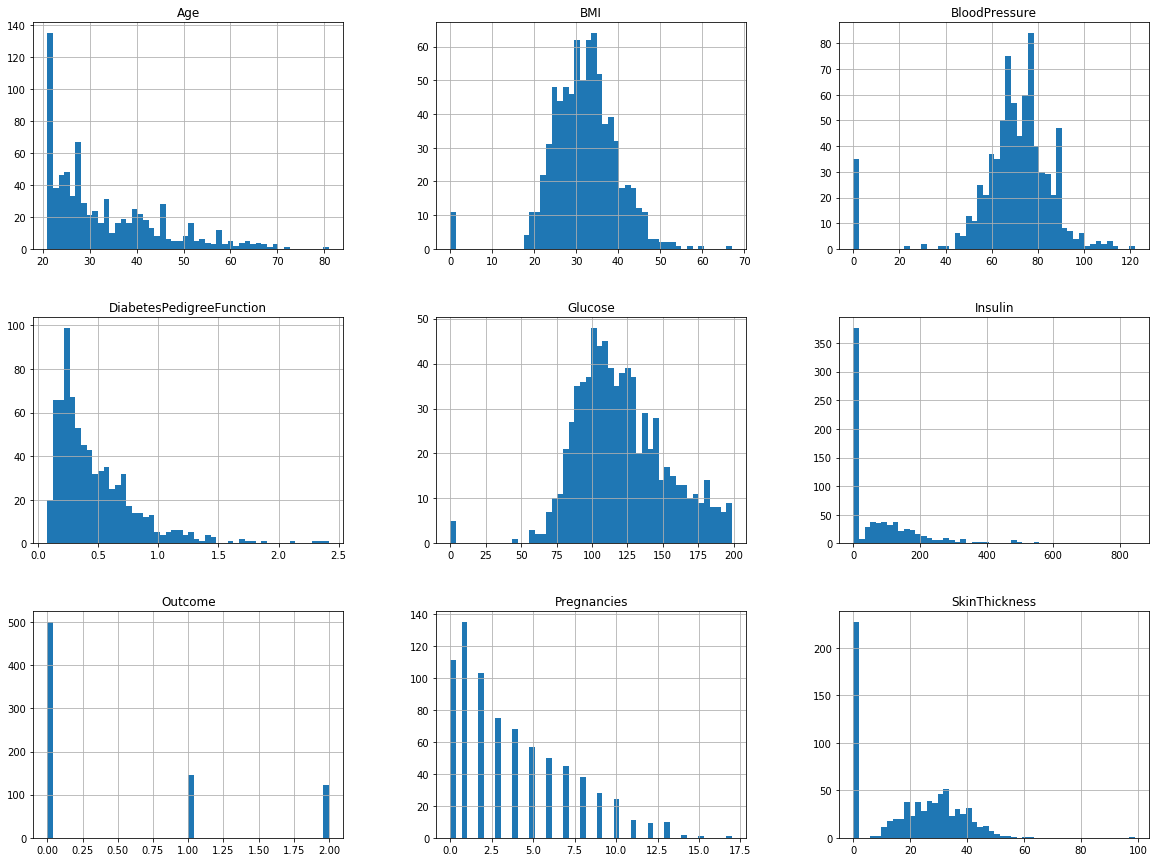

In [124]:
#Vizualising the attributes
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

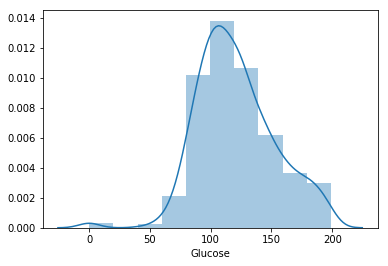

In [125]:
#sns.heatmap(dataset)
sns.distplot(dataset['Glucose'],kde=True, bins=10);


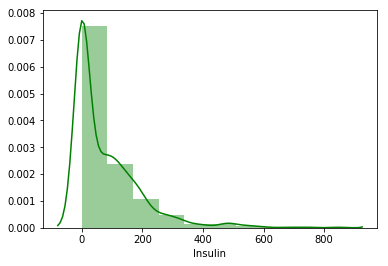

In [126]:
sns.distplot(dataset['Insulin'],kde=True, bins=10,color='green');

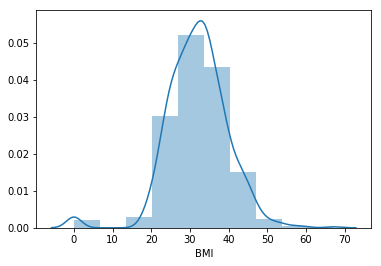

In [127]:
sns.distplot(dataset['BMI'],kde=True, bins=10);

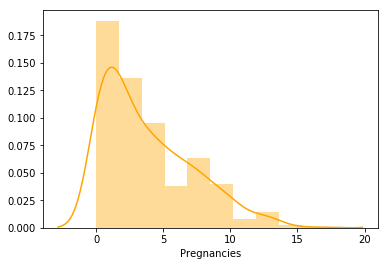

In [128]:
sns.distplot(dataset['Pregnancies'],kde=True, bins=10,color='orange');

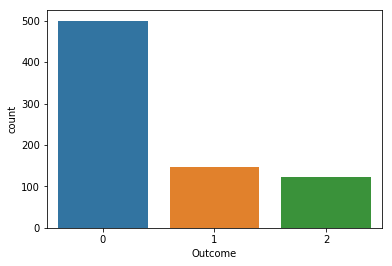

In [129]:
sns.countplot(dataset['Outcome'],label="Count")


In [130]:
#Calculating median and mean of the attributes
median_bmi = dataset['BMI'].median()
mean_bmi=dataset['BMI'].mean()
print("The median BMI is :",median_bmi)
print("The mean BMI is :",mean_bmi)

The median BMI is : 32.0
The mean BMI is : 31.992578124999977


In [131]:
median_bp=dataset['BloodPressure'].median()
mean_bp=dataset['BloodPressure'].mean()
print('Median Blood Pressure is:',median_bp)
print('Mean Blood Preddure is :',mean_bp)

Median Blood Pressure is: 72.0
Mean Blood Preddure is : 69.10546875


In [132]:
median_insulin=dataset['Insulin'].median()
mean_insulin=dataset['Insulin'].mean()
print('Median Insulin is:',median_insulin)
print('Mean Insulin is :',mean_insulin)

Median Insulin is: 30.5
Mean Insulin is : 79.79947916666667


In [133]:
median_skin=dataset['SkinThickness'].median()
mean_skin=dataset['SkinThickness'].mean()
print('Median Skin Thickness is:',median_skin)
print('Mean SkinThickness is :',mean_skin)

Median Skin Thickness is: 23.0
Mean SkinThickness is : 20.536458333333332


In [134]:
median_preg=dataset['Pregnancies'].median()
mean_preg=dataset['Pregnancies'].mean()
print('Median Pregnancy is:',median_preg)
print('Mean Pregnancy is :',mean_preg)

Median Pregnancy is: 3.0
Mean Pregnancy is : 3.8450520833333335


In [135]:
median_age=dataset['Age'].median()
mean_age=dataset['Age'].mean()
print('Median Age is:',median_age)
print('Mean Age is :',mean_age)

Median Age is: 29.0
Mean Age is : 33.240885416666664


In [136]:
median_glucose=dataset['Glucose'].median()
mean_glucose=dataset['Glucose'].mean()
print('Median Glucose is:',median_glucose)
print('Mean Glucose is :',mean_glucose)

Median Glucose is: 117.0
Mean Glucose is : 120.89453125


In [137]:
median_DiabetesPedigreeFunction=dataset['DiabetesPedigreeFunction'].median()
mean_DiabetesPedigreeFunction=dataset['DiabetesPedigreeFunction'].mean()
print('Median DiabetesPedigreeFunction is:',median_DiabetesPedigreeFunction)
print('Mean DiabetesPedigreeFunction is :',mean_DiabetesPedigreeFunction)

Median DiabetesPedigreeFunction is: 0.3725
Mean DiabetesPedigreeFunction is : 0.4718763020833327


In [138]:
#Replacing the values of the attributes which have 0 i them with median of all the attributes
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(
    to_replace=0, value=median_DiabetesPedigreeFunction)
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_glucose)
dataset['Age'] = dataset['Age'].replace(
    to_replace=0, value=median_age)
dataset['Pregnancies'] = dataset['Pregnancies'].replace(
    to_replace=0, value=median_preg)
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skin)
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_insulin)
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bp)
#sns.distplot(dataset['BMI'],kde=True, bins=10);

Text(0.5, 1.0, 'Relation between Insulin and Glucose')

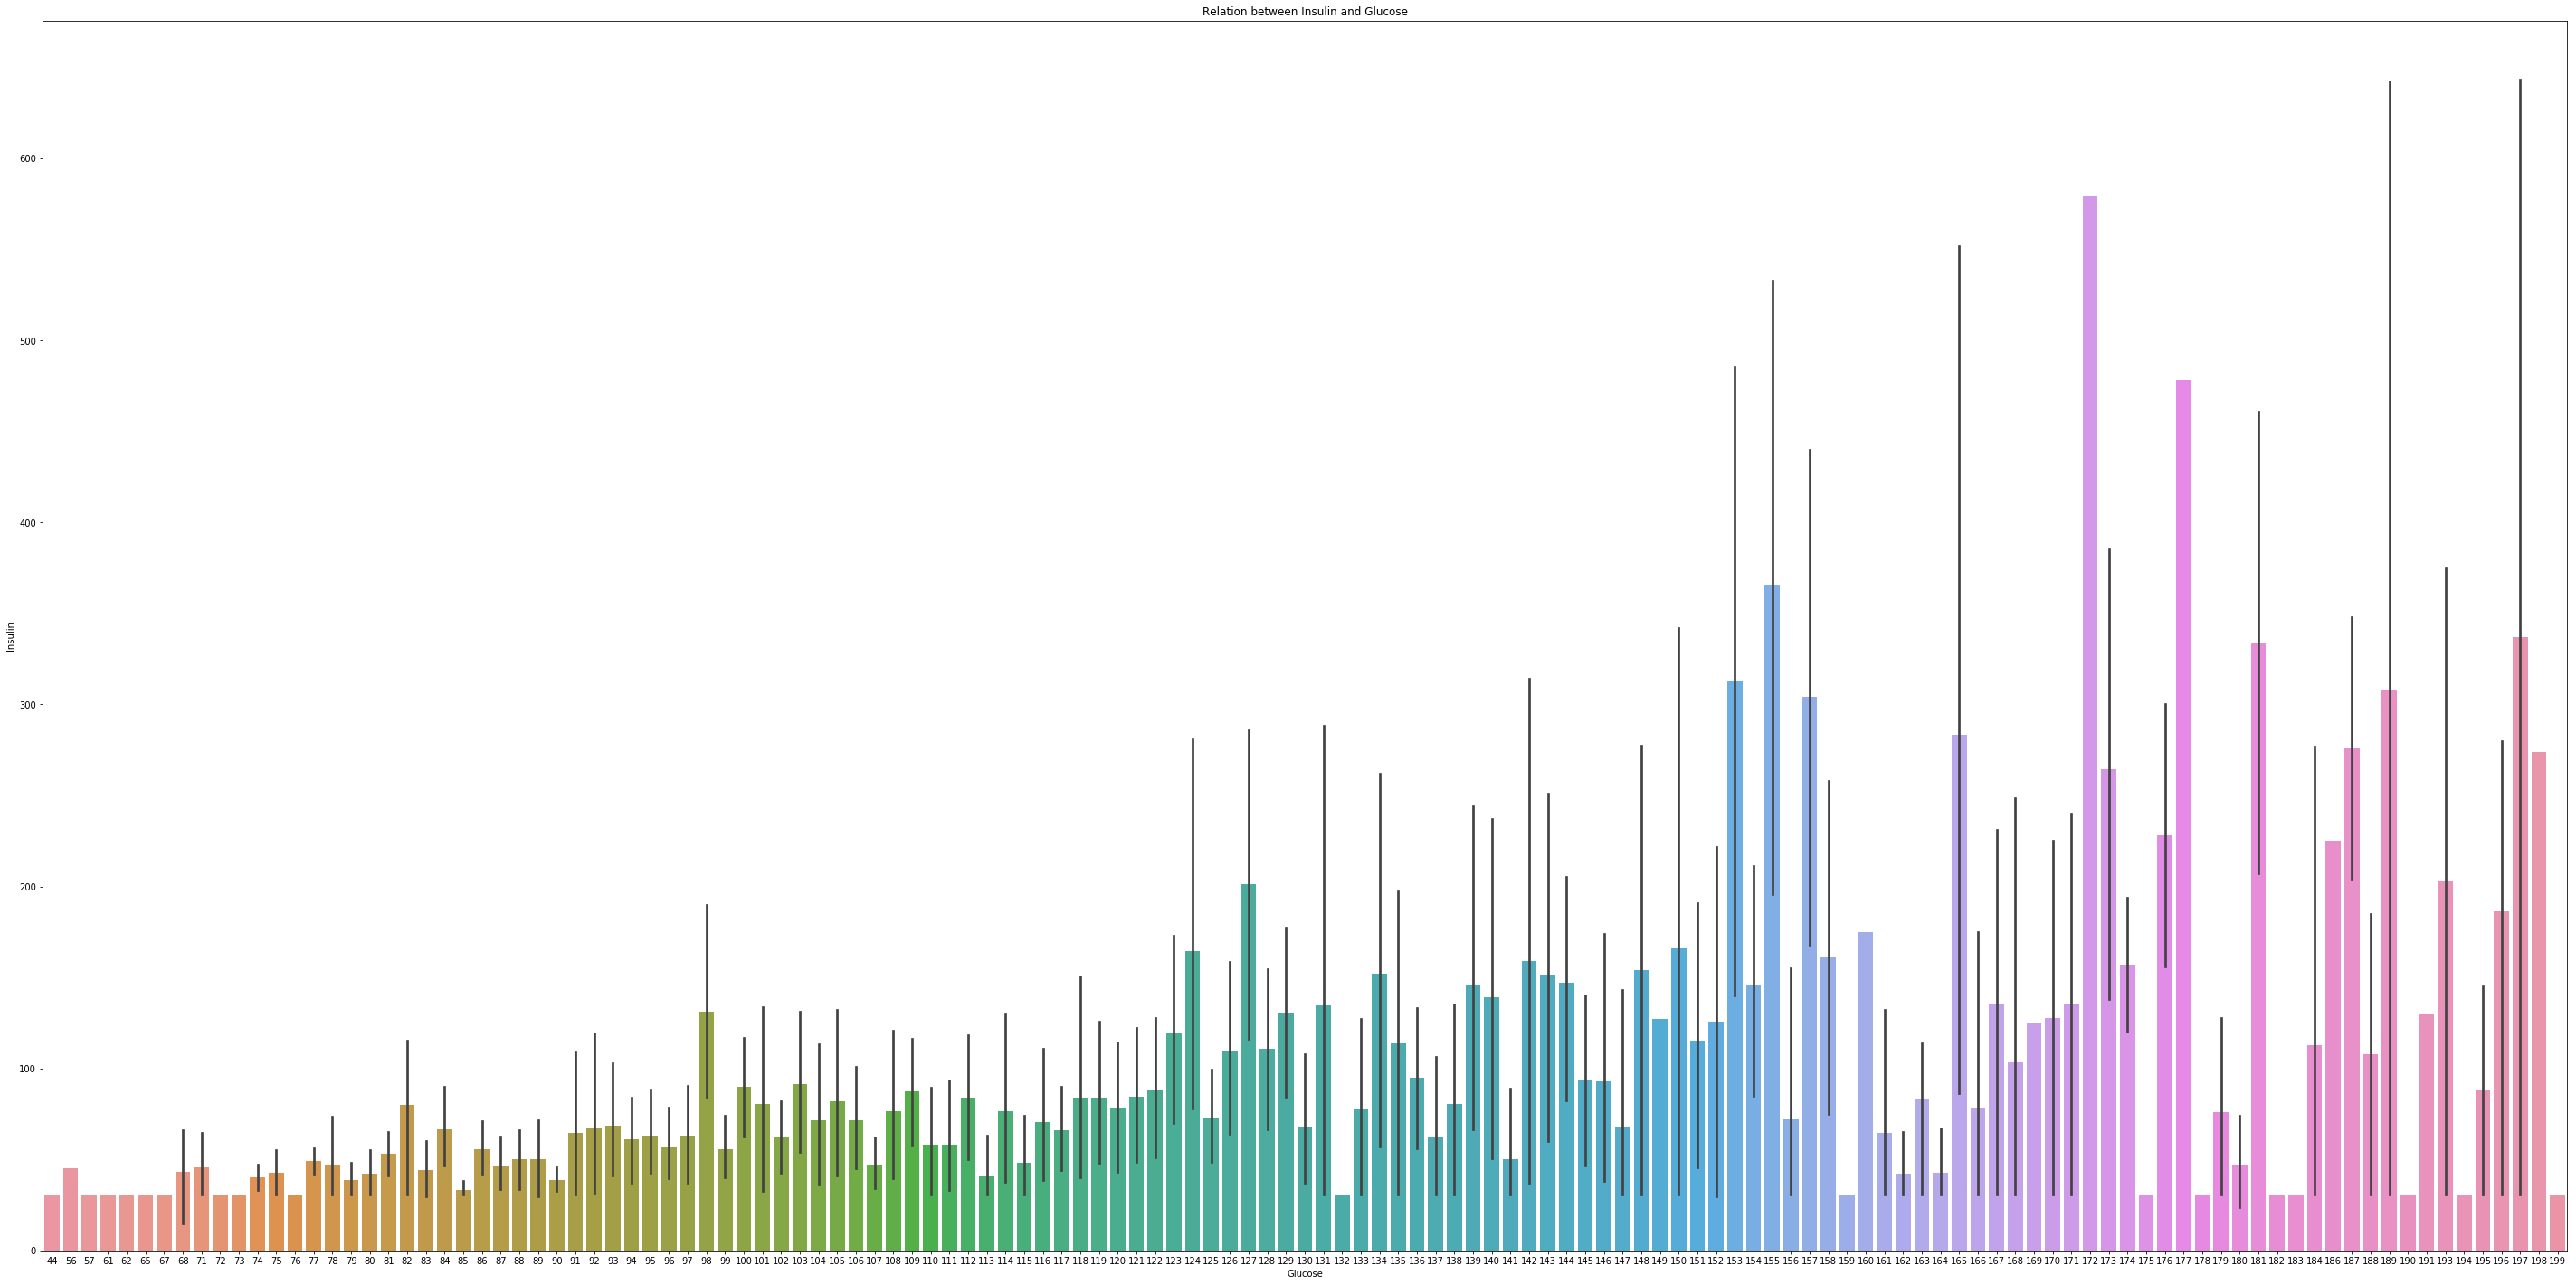

In [139]:
plt.figure(figsize=(50,25))
sns.barplot(x=dataset['Glucose'],y=dataset['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Relation between Insulin and Glucose')

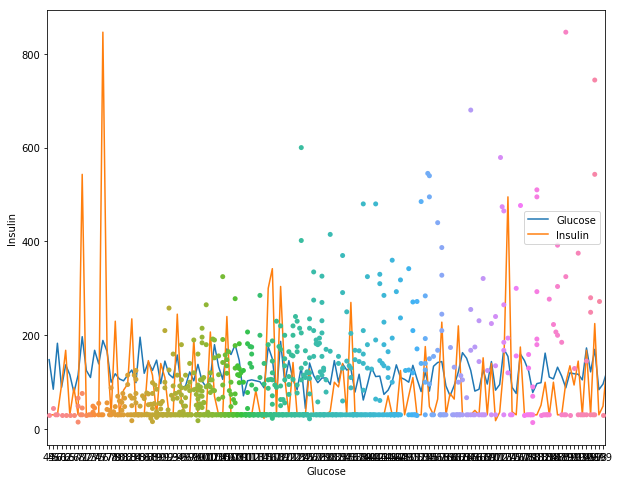

In [140]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dataset['Glucose'],label='Glucose')
sns.lineplot(data=dataset['Insulin'],label='Insulin')

sns.swarmplot(x=dataset['Glucose'],y=dataset['Insulin'])

In [141]:

#sns.swarmplot(x=dataset['Glucose'],y=dataset['Insulin'])

In [142]:
X = dataset.drop('Outcome', axis=1)
Y = dataset['Outcome']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [144]:
#Making of Decision Tree Model 
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [145]:
y_pred = classifier.predict(X_test)

In [146]:
print(confusion_matrix(y_test, y_pred))


[[72 24  7]
 [ 8 16  0]
 [ 9  1 17]]


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       103
           1       0.39      0.67      0.49        24
           2       0.71      0.63      0.67        27

   micro avg       0.68      0.68      0.68       154
   macro avg       0.64      0.67      0.64       154
weighted avg       0.73      0.68      0.70       154



In [148]:
df = pd.DataFrame({'  Actual Type of Diabetes ': y_test, '   Predicted Type of Diabetes': y_pred})
df1 = df.head(50)
print(df1)


       Actual Type of Diabetes      Predicted Type of Diabetes
1                             0                              0
182                           0                              0
245                           1                              1
764                           0                              0
650                           0                              0
730                           2                              0
183                           0                              0
671                           0                              0
59                            0                              0
427                           2                              2
113                           0                              0
486                           0                              0
669                           0                              2
358                           0                              0
243                           2                        

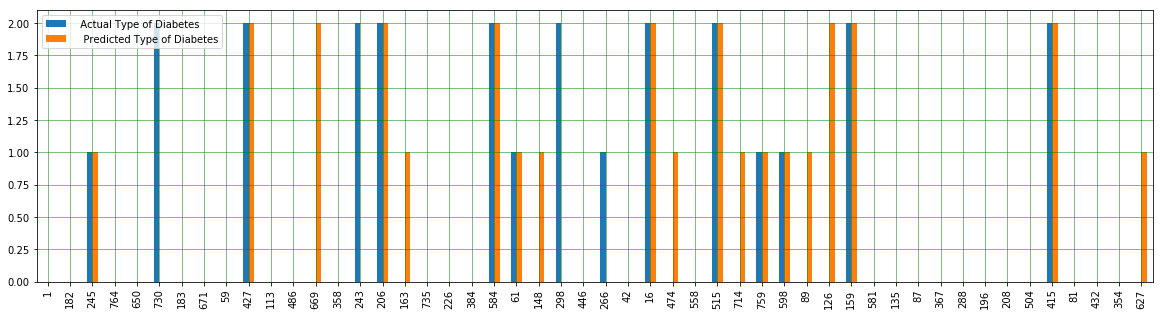

In [149]:
df1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42207792207792205
Mean Squared Error: 0.6298701298701299
Root Mean Squared Error: 0.7936435786107829


In [151]:
r2_score(y_test,y_pred)

-0.048722269025554654

In [152]:
print("The accuracy of the model is :" ,accuracy_score(y_test, y_pred)*100)

The accuracy of the model is : 68.18181818181817


In [153]:
#Taking random input from the user
Xnew = [[1,0,68,35,0,32.0,0.389,22]]

In [154]:
ynew = classifier.predict(Xnew)

In [155]:
print("X=%s, Predicted Type of Diabetes is : Type-%s" % (Xnew[0], ynew[0]))

X=[1, 0, 68, 35, 0, 32.0, 0.389, 22], Predicted Type of Diabetes is : Type-0


In [156]:
Xnew = [[5,0,80,32,0,41.0,0.346,37]]

In [157]:
ynew = classifier.predict(Xnew)
print("X=%s, Predicted Type of Diabetes is : Type-%s" % (Xnew[0], ynew[0]))

X=[5, 0, 80, 32, 0, 41.0, 0.346, 37], Predicted Type of Diabetes is : Type-0


In [158]:
######3######End Of Decisin Tree Model ##########

In [159]:
#Now Logistic REgression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model2=LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
logreg_pred=model2.predict(X_test)

In [161]:
df2 = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': logreg_pred})
df3 = df.head(25)
print(df3)

       Actual Type of Diabetes      Predicted Type of Diabetes
1                             0                              0
182                           0                              0
245                           1                              1
764                           0                              0
650                           0                              0
730                           2                              0
183                           0                              0
671                           0                              0
59                            0                              0
427                           2                              2
113                           0                              0
486                           0                              0
669                           0                              2
358                           0                              0
243                           2                        

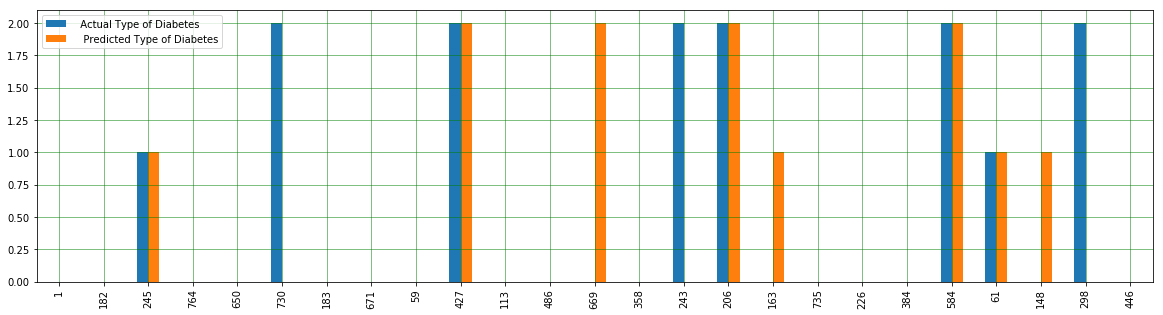

In [162]:
df3.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [163]:
r2_score(y_test,logreg_pred)

-0.0270991294580174

In [164]:
print("The accuracy score is :",accuracy_score(y_test,logreg_pred)*100,"%")#Accuracy Prediction

The accuracy score is : 75.32467532467533 %


In [165]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       103
           1       0.67      0.42      0.51        24
           2       0.79      0.41      0.54        27

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.58      0.63       154
weighted avg       0.75      0.75      0.73       154



In [166]:
print(confusion_matrix(y_test, logreg_pred))

[[95  5  3]
 [14 10  0]
 [16  0 11]]


In [167]:
Xnew = [[5,0,80,32,0,41.0,0.346,37]]
ynew = model2.predict(Xnew)
print("X=%s, Predicted Type of Diabetes is : Type-%s" % (Xnew[0], ynew[0]))

X=[5, 0, 80, 32, 0, 41.0, 0.346, 37], Predicted Type of Diabetes is : Type-0


In [168]:
########## End of Logistic Regression Model ##########

########## Beginning Of Support Vector Machine Model######

In [212]:
from sklearn.svm import LinearSVC     #Using support vector classifier
model3 = LinearSVC(C=1000)
model3.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [213]:
svc_pred=model3.predict(X_test)

In [214]:
print(confusion_matrix(y_test,svc_pred))

[[102   1   0]
 [ 21   3   0]
 [ 27   0   0]]


In [215]:
print("The accuracy of the model is :" ,accuracy_score(y_test, svc_pred)*100)#Accuracy Prediction

The accuracy of the model is : 68.18181818181817


In [241]:
df4 = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': logreg_pred})
df5 = df.head(25)
print(df5)

       Actual Type of Diabetes      Predicted Type of Diabetes
1                             0                              0
182                           0                              0
245                           1                              1
764                           0                              0
650                           0                              0
730                           2                              0
183                           0                              0
671                           0                              0
59                            0                              0
427                           2                              2
113                           0                              0
486                           0                              0
669                           0                              2
358                           0                              0
243                           2                        

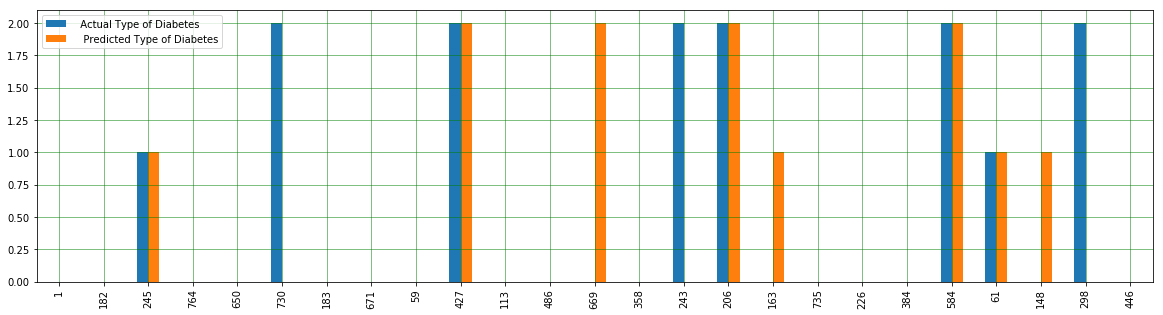

In [242]:
df5.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [243]:
Xnew = [[5,0,80,32,0,41.0,0.346,37]]
ynew = model3.predict(Xnew)
print("X=%s, Predicted Type of Diabetes is : Type-%s" % (Xnew[0], ynew[0]))

X=[5, 0, 80, 32, 0, 41.0, 0.346, 37], Predicted Type of Diabetes is : Type-0


In [244]:
########## End of Support Vector Machine Model ##########

In [245]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [246]:
KNN_pred = classifier.predict(X_test)

In [247]:
print(confusion_matrix(y_test, y_pred))


[[72 24  7]
 [ 8 16  0]
 [ 9  1 17]]


In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       103
           1       0.39      0.67      0.49        24
           2       0.71      0.63      0.67        27

   micro avg       0.68      0.68      0.68       154
   macro avg       0.64      0.67      0.64       154
weighted avg       0.73      0.68      0.70       154



In [249]:
print("Accuracy score is  :",accuracy_score(y_test,KNN_pred)*100,"%")

Accuracy score is  : 71.42857142857143 %


In [257]:
df6 = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': KNN_pred})
df7 = df.head(25)
print(df7)

       Actual Type of Diabetes      Predicted Type of Diabetes
1                             0                              0
182                           0                              0
245                           1                              1
764                           0                              0
650                           0                              0
730                           2                              0
183                           0                              0
671                           0                              0
59                            0                              0
427                           2                              2
113                           0                              0
486                           0                              0
669                           0                              2
358                           0                              0
243                           2                        

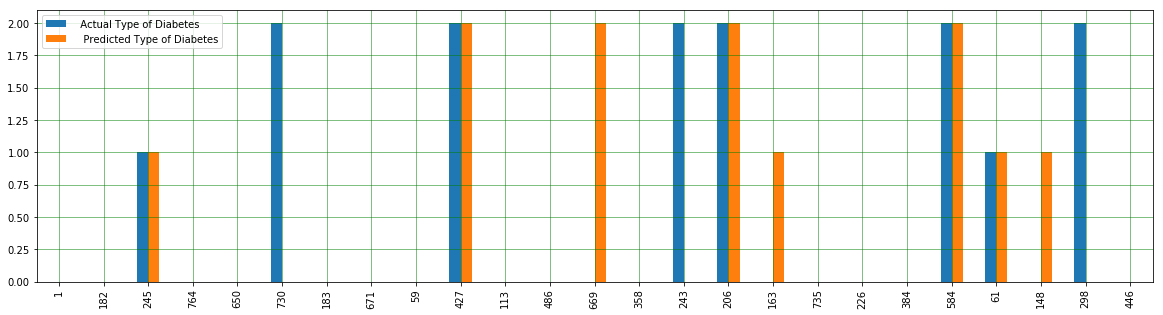

In [258]:
df7.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [259]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

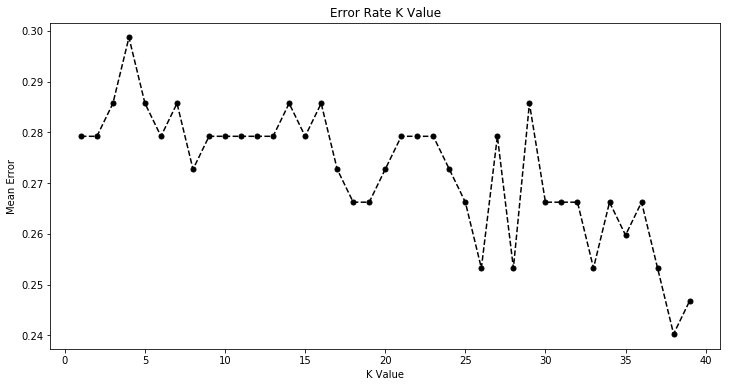

In [260]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='.',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

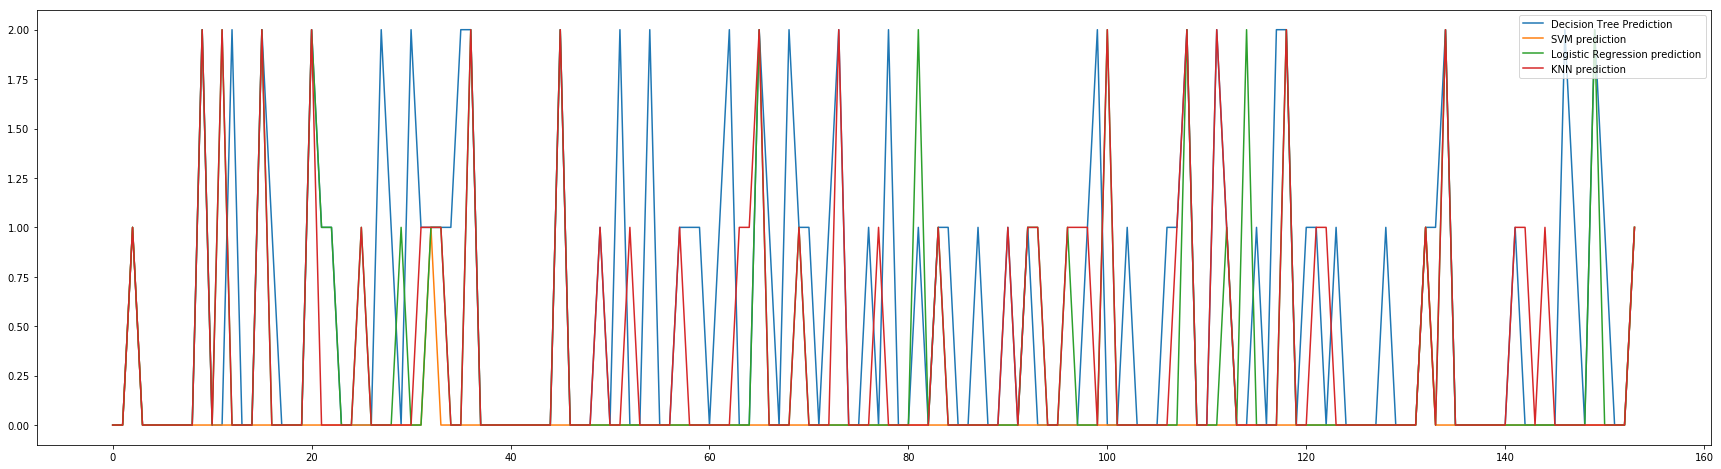

In [271]:
plt.figure(figsize=(30,8))
m=y_pred
n=svc_pred
o=logreg_pred
p=KNN_pred
plt.plot(m,label='Decision Tree Prediction')
plt.plot(n,label='SVM prediction')
plt.plot(o,label='Logistic Regression prediction')
plt.plot(p,label='KNN prediction')
plt.legend()
plt.show()

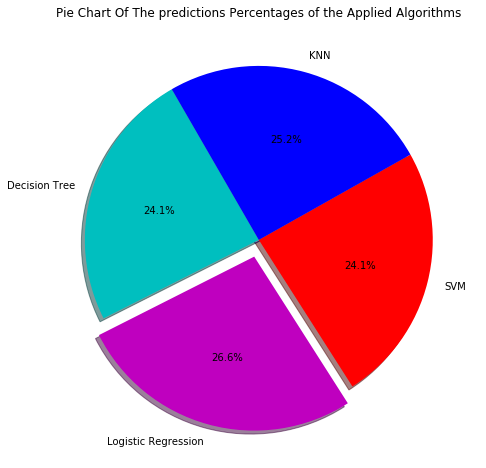

In [286]:
plt.figure(figsize=(10,8))
slices = [68,75,68,71]
activities = ['Decision Tree','Logistic Regression','SVM','KNN']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=120,
        shadow= True,
        explode=(0,0.1,0,0),
       autopct='%1.1f%%')

plt.title('Pie Chart Of The predictions Percentages of the Applied Algorithms')
plt.show()